WE WANT TO PREDICT IF THE PERSON SURVIVED OR NO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull()   #gives a dataframe of true and false. False if not null, true if null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
sns.set_style('whitegrid')

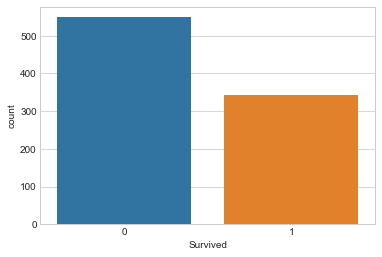

In [7]:
sns.countplot(data=data,x='Survived')
#We have more people who did not survive

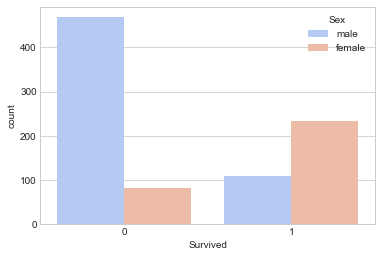

In [8]:
#females survived more as compared to males
sns.countplot(data=data,x='Survived',hue='Sex',palette='coolwarm')

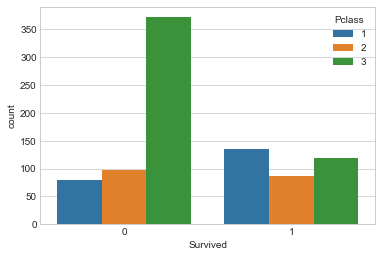

In [9]:
#Shows that people who did not survive are part of the 3rd class (lowest)
sns.countplot(data=data,x='Survived',hue='Pclass')

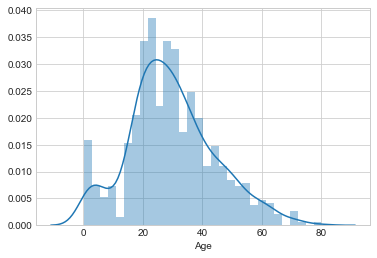

In [10]:
#Age of passengers was mostly between 20-40
sns.distplot(data['Age'].dropna(),bins=30)

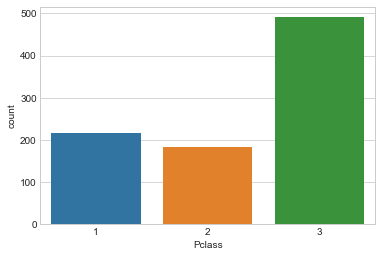

In [11]:
#Most of people are in 3rd class
sns.countplot(data['Pclass'])

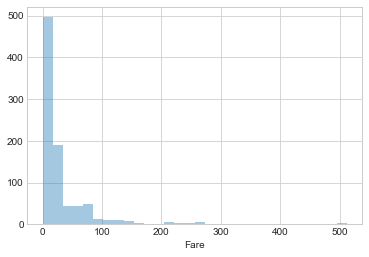

In [12]:
#Most purchase prices are between 0 and 50 which makes sense because as seen above, we have more 
#people in the 3rd class

sns.distplot(data['Fare'],bins=30,kde=False)

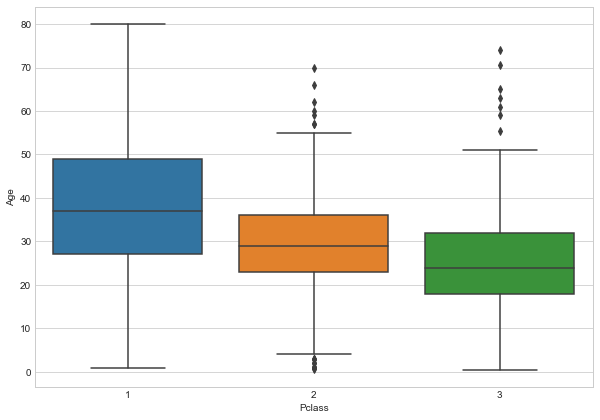

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,x='Pclass',y='Age')

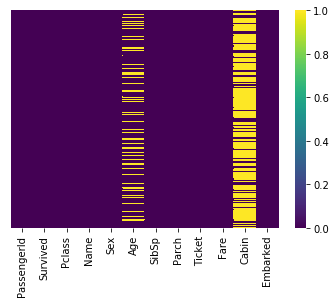

In [5]:
#Make a heatmap to see where most null values are.
#yellow bars show nulls
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [18]:
#Since we have a lot of missing values in Age, instead of dropping them, we can guess the age values where the 
#value is null based on their Pclass

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        #from the boxplot we can see that avg age of Pclass=1 passenger is 37
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age
        

In [19]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1) #axis =1 because i want to apply columnwise


In [22]:
#dropping cabin
data.drop('Cabin',axis=1,inplace=True)

In [25]:
#dropping any other missing values
data.dropna(inplace=True)

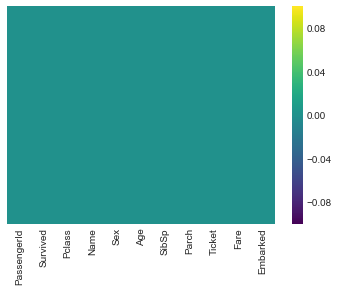

In [27]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
#We see that now there are no missing values

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
#Convert categorical columns into dummy variables for the algorithm to understand
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [29]:
sex.head()
# for each row in the dataset algo will predict if the sex is male or not

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
#create dummies for embarked column
#all columns must not be perfect predictors of each other so we take one as a ref
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [33]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
#Adding the newly created columns by concat
#axis=1 because we add them as cols
data=pd.concat([data,sex,embark],axis=1)

In [36]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [39]:
#dropping the unnecasry cols
#set axis=1 because we are dropping columns
data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [40]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


BUILDING THE LOGISTIC MODEL

In [42]:
#we want all cols in X except survived, so we drop survived from X and take rest cols
X=data.drop('Survived',axis=1)
y=data['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression


In [65]:
logmodel=LogisticRegression()

In [66]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
predict=logmodel.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [73]:

print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))
#precision is not that bad, 82%

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267

[[151  12]
 [ 36  68]]
